In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('NAZDAQ-modelling-advanced-features.csv')
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

In [3]:
df.head()

,change_percent,dayNumber,year,is_quarter_end,high_ratio,low_ratio,daily_middle_ratio,Moving5DayClose_ratio,Moving10DayClose_ratio,Moving20DayClose_ratio,...,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,target
date,,,,,,,,,,,,,,,,,,,,,
1985-10-28,-0.08,28,1985,0,0.999210,1.005433,1.002312,0.993679,0.995666,1.014111,...,False,False,False,False,False,False,True,False,False,1.0
1985-10-29,1.39,29,1985,0,0.997105,1.014015,1.005489,1.005787,1.007706,1.026697,...,False,False,False,False,False,False,True,False,False,1.0
1985-10-30,0.32,30,1985,0,0.996943,1.003728,1.000324,1.007774,1.009654,1.027728,...,False,False,False,False,False,False,True,False,False,0.0
1985-10-31,-0.25,31,1985,0,0.994574,1.002822,0.998681,1.005258,1.006476,1.023060,...,False,False,False,False,False,False,True,False,False,1.0
1985-11-01,0.69,1,1985,0,0.995718,1.006884,1.001270,1.008028,1.011681,1.027282,...,False,False,False,False,False,False,False,True,False,0.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
change_percent,9531.0,0.064805,1.653416,-15.080000,-0.670000,0.120000,0.840000,18.770000
dayNumber,9531.0,15.734655,8.748869,1.000000,8.000000,16.000000,23.000000,31.000000
year,9531.0,2004.211415,10.926354,1985.000000,1995.000000,2004.000000,2014.000000,2023.000000
is_quarter_end,9531.0,0.335956,0.472348,0.000000,0.000000,0.000000,1.000000,1.000000
high_ratio,9531.0,0.991571,0.010459,0.849154,0.988580,0.995151,0.998387,1.000000
low_ratio,9531.0,1.009600,0.010879,1.000000,1.003011,1.006613,1.012423,1.211304
daily_middle_ratio,9531.0,1.000462,0.008444,0.918492,0.996465,1.000798,1.004554,1.095046
Moving5DayClose_ratio,9531.0,1.001068,0.017299,0.824084,0.992542,1.002379,1.010628,1.107292
Moving10DayClose_ratio,9531.0,1.002436,0.025828,0.762787,0.989685,1.004576,1.016766,1.182821
Moving20DayClose_ratio,9531.0,1.005203,0.037336,0.689848,0.986756,1.008830,1.026695,1.207287


In [5]:
df.columns

Index(['change_percent', 'dayNumber', 'year', 'is_quarter_end', 'high_ratio',
       'low_ratio', 'daily_middle_ratio', 'Moving5DayClose_ratio',
       'Moving10DayClose_ratio', 'Moving20DayClose_ratio',
       'all_time_high_ratio', 'yearly_max_to_date_ratio',
       'yearly_min_to_date_ratio', 'yearly_avg_to_date_ratio',
       'monthly_max_to_date_ratio', 'monthly_min_to_date_ratio',
       'monthly_avg_to_date_ratio', 'volume_vs_20d_ratio', 'run',
       'DecreasingMA5-10', 'DecreasingMA5-20', 'DecreasingMA10-20',
       'close_vs_cumulativechange_ratio', 'day_Tuesday', 'day_Wednesday',
       'day_Thursday', 'day_Friday', 'month_February', 'month_March',
       'month_April', 'month_May', 'month_June', 'month_July', 'month_August',
       'month_September', 'month_October', 'month_November', 'month_December',
       'target'],
      dtype='object')

In [6]:
df.head()

,change_percent,dayNumber,year,is_quarter_end,high_ratio,low_ratio,daily_middle_ratio,Moving5DayClose_ratio,Moving10DayClose_ratio,Moving20DayClose_ratio,...,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,target
date,,,,,,,,,,,,,,,,,,,,,
1985-10-28,-0.08,28,1985,0,0.999210,1.005433,1.002312,0.993679,0.995666,1.014111,...,False,False,False,False,False,False,True,False,False,1.0
1985-10-29,1.39,29,1985,0,0.997105,1.014015,1.005489,1.005787,1.007706,1.026697,...,False,False,False,False,False,False,True,False,False,1.0
1985-10-30,0.32,30,1985,0,0.996943,1.003728,1.000324,1.007774,1.009654,1.027728,...,False,False,False,False,False,False,True,False,False,0.0
1985-10-31,-0.25,31,1985,0,0.994574,1.002822,0.998681,1.005258,1.006476,1.023060,...,False,False,False,False,False,False,True,False,False,1.0
1985-11-01,0.69,1,1985,0,0.995718,1.006884,1.001270,1.008028,1.011681,1.027282,...,False,False,False,False,False,False,False,True,False,0.0


In [7]:
correlations = df.corr()['target'].abs().sort_values(ascending=False)

# Display the top correlated features
print(correlations)


target                             1.000000
is_quarter_end                     0.037965
day_Tuesday                        0.029005
all_time_high_ratio                0.027293
yearly_max_to_date_ratio           0.026238
run                                0.023663
DecreasingMA10-20                  0.018326
month_November                     0.018241
month_March                        0.017969
month_September                    0.017075
yearly_avg_to_date_ratio           0.016760
day_Friday                         0.016505
month_February                     0.016353
DecreasingMA5-20                   0.015666
month_June                         0.015299
day_Thursday                       0.014656
month_December                     0.014321
change_percent                     0.013163
Moving20DayClose_ratio             0.013076
day_Wednesday                      0.012889
dayNumber                          0.010046
monthly_max_to_date_ratio          0.008464
monthly_min_to_date_ratio       

The code below fits a regression model using only the most highly correlated feature, which is 'is_quarter_end'.

In [43]:
top_features = df.corr()['target'].abs().sort_values(ascending=False).index[1:2]

# Splitting the training and test data manually using the top features
X_train = df[df['year'] < 2010][top_features]
y_train = df[df['year'] < 2010]['target']

X_test = df[df['year'] >= 2010][top_features]
y_test = df[df['year'] >= 2010]['target']

# Create and fit the RobustScaler to the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use RandomOverSampler to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_scaled, y_train)

# Create and train a logistic regression model using the scaled features and balanced data
model = LogisticRegression(max_iter=5000)
model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the scaled features
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.54
              precision    recall  f1-score   support

         0.0       0.48      0.36      0.41      1553
         1.0       0.56      0.68      0.62      1879

    accuracy                           0.54      3432
   macro avg       0.52      0.52      0.51      3432
weighted avg       0.53      0.54      0.52      3432



The results in an accuracy of 0.54 and a precision of 0.56 for class 1, the signal to buy.

### Which features to use

I will now iterate through the columns to investigate which subset of columns produces the most accurate model, I will order the columns from highest correlation, in absolute terms, to lowest and combine them using this order.


In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Features', 'Accuracy'])

# Get the feature names excluding 'target'
all_features = df.drop('target', axis=1).columns

# Iterate through the number of features you want to include
for num_features in range(1, len(all_features) + 1):
    # Get the top N most correlated features with the target variable
    top_features = df.corr()['target'].abs().sort_values(ascending=False).index[1:num_features+1]

    # Splitting the training and test data manually using the top features
    X_train = df[df['year'] < 2010][top_features]
    y_train = df[df['year'] < 2010]['target']

    X_test = df[df['year'] >= 2010][top_features]
    y_test = df[df['year'] >= 2010]['target']

    # Create and fit the RobustScaler to the training data
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Use RandomOverSampler to balance the classes
    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
    X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_scaled, y_train)

    # Create and train a logistic regression model using the scaled features and balanced data
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions on the test set using the scaled features
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Append the results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Features': [num_features], 'Accuracy': [accuracy]})], ignore_index=True)

# Print the results
print(results_df)


   Features  Accuracy
0         1  0.536422
1         2  0.465035
2         3  0.509907
3         4  0.515443
4         5  0.513403
5         6  0.516608
6         7  0.512529
7         8  0.512529
8         9  0.512821
9        10  0.517774
10       11  0.516608
11       12  0.514569
12       13  0.513403
13       14  0.511364
14       15  0.505245
15       16  0.505828
16       17  0.510198
17       18  0.510198
18       19  0.501748
19       20  0.499709
20       21  0.502622
21       22  0.500874
22       23  0.499709
23       24  0.500000
24       25  0.502622
25       26  0.498834
26       27  0.480769
27       28  0.479895
28       29  0.484557
29       30  0.481352
30       31  0.485140
31       32  0.481643
32       33  0.481352
33       34  0.481643
34       35  0.482226
35       36  0.481352
36       37  0.481935
37       38  0.483100


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from itertools import combinations

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Features', 'Accuracy'])

# Get the feature names excluding 'target'
all_features = df.drop('target', axis=1).columns

# Iterate through different numbers of features
for num_features in range(1, len(all_features) + 1):
    # Generate all combinations of feature columns
    feature_combinations = combinations(all_features, num_features)

    # Iterate through each combination
    for features in feature_combinations:
        features = list(features)

        # Splitting the training and test data manually using the selected features
        X_train = df[df['year'] < 2010][features]
        y_train = df[df['year'] < 2010]['target']

        X_test = df[df['year'] >= 2010][features]
        y_test = df[df['year'] >= 2010]['target']

        # Create and fit the RobustScaler to the training data
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Use RandomOverSampler to balance the classes
        oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
        X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_scaled, y_train)

        # Create and train a logistic regression model using the scaled features and balanced data
        model = LogisticRegression(max_iter=5000)
        model.fit(X_train_balanced, y_train_balanced)

        # Make predictions on the test set using the scaled features
        y_pred = model.predict(X_test_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)

        # Append the results to the DataFrame
        results_df = pd.concat([results_df, pd.DataFrame({'Features': [features], 'Accuracy': [accuracy]})], ignore_index=True)

# Print the results
print(results_df.sort_values(by='Accuracy', ascending=False).head())

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

# Splitting the traing and test data manually

X_train = df[df['year'] < 2010].drop([ 'target'], axis=1)
y_train = df[df['year'] < 2010]['target']

X_test = df[df['year'] >= 2010].drop([ 'target'], axis=1)
y_test = df[df['year'] >= 2010]['target']

# Create and fit the RobustScaler to the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use RandomOverSampler to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create logistic regression model
logreg = LogisticRegression(max_iter=5000)

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='precision')

# Fit the grid search to the data
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best parameters to create and train the final model
best_model = LogisticRegression(max_iter=5000, **best_params)
best_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the scaled features
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_cl

C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\benro\anaconda3\envs\ensemble\l

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.48
              precision    recall  f1-score   support

         0.0       0.46      0.76      0.57      1553
         1.0       0.56      0.24      0.34      1879

    accuracy                           0.48      3432
   macro avg       0.51      0.50      0.46      3432
weighted avg       0.51      0.48      0.44      3432



NameError: name 'sklearn' is not defined

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Splitting the traing and test data manually

X_train = df[df['year'] < 2010].drop([ 'target'], axis=1)
y_train = df[df['year'] < 2010]['target']

X_test = df[df['year'] >= 2010].drop([ 'target'], axis=1)
y_test = df[df['year'] >= 2010]['target']

# Create and fit the RobustScaler to the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use RandomOverSampler to balance the classes
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_scaled, y_train)

# Create and train a logistic regression model using the scaled features and balanced data
model = LogisticRegression(max_iter=5000)
model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the scaled features
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.48
              precision    recall  f1-score   support

         0.0       0.45      0.75      0.57      1553
         1.0       0.55      0.25      0.35      1879

    accuracy                           0.48      3432
   macro avg       0.50      0.50      0.46      3432
weighted avg       0.51      0.48      0.45      3432



In [ ]:
# Create and fit the RobustScaler to the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use RandomOverSampler to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_scaled, y_train)

# Create and train a logistic regression model using the scaled features and balanced data
model = LogisticRegression(max_iter=5000)
model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the scaled features
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))


In [7]:
# Adding the predicted target as a new column to X_test
X_test['predicted_target'] = y_pred

#### Evaluation


In [8]:
import pandas as pd

# Assuming X_test includes the 'predicted_target' and 'change_percent' columns
# You may need to adjust the column names based on your data
invested_amount = 10  # Initial investment amount
total_investment = 0  # Total amount invested
balance = 0  # Initial balance

# Create a list to store the investment balance and total investment at each prediction
investment_balance = []
total_investment_list = []

for index, row in X_test.iterrows():
    # Update the balance based on the change percentage
    balance *= (1 + row['change_percent'] / 100)
    if row['predicted_target'] == 1:
        # Invest $10 at the end of the day when the model predicts a 1
        # Update the balance based on the change percentage
        total_investment += invested_amount
        balance += invested_amount

    # Update the investment balance and total investment at each step
    investment_balance.append(balance)
    total_investment_list.append(total_investment)

# Create new columns in X_test to store the investment balance and total investment
X_test['investment_balance'] = investment_balance
X_test['total_investment'] = total_investment_list

# Calculate the final investment balance
final_balance = X_test['investment_balance'].iloc[-1]

# Calculate the return rate
return_rate = final_balance / total_investment

print(f"Total Amount Invested: ${total_investment:.2f}")
print(f"Final Investment Balance: ${final_balance:.2f}")
print(f"Return Rate: {return_rate * 100:.2f}%")


Total Amount Invested: $13100.00
Final Investment Balance: $47461.81
Return Rate: 362.30%


Using the model to determine when to purchase the stock had resulted in  increasing the value of our money from \\$11070 to $39011.95, an increase of 352.41%. This is largely caused by the Value of the NAZDAQ stock increasing in value significantly during this period as well. We can see that the value of our investment starts to closely follow the shape of the stock price.

In order to really analyze the effectiveness of this model I will compare investing the same amount of money over the same time period using Dollar cost Averaging.

In [9]:
X_test.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change_percent',
       'avg_vol_20d', 'daily_middle', 'dayNumber', 'year', 'is_quarter_end',
       'Moving5DayClose', 'Moving10DayClose', 'Moving20DayClose',
       'all_time_high', 'yearly_max_to_date', 'yearly_min_to_date',
       'yearly_avg_to_date', 'monthly_max_to_date', 'monthly_min_to_date',
       'monthly_avg_to_date', 'cumulativechange', 'run', 'DecreasingMA5-10',
       'DecreasingMA5-20', 'DecreasingMA10-20', 'day_Tuesday', 'day_Wednesday',
       'day_Thursday', 'day_Friday', 'month_February', 'month_March',
       'month_April', 'month_May', 'month_June', 'month_July', 'month_August',
       'month_September', 'month_October', 'month_November', 'month_December',
       'predicted_target', 'investment_balance', 'total_investment'],
      dtype='object')

In [10]:
# Determine the number of Wednesdays in your dataset
wednesdays = X_test[X_test.index.day_name() == 'Wednesday']

# Calculate the total number of Wednesdays and evenly distribute the total investment amount
num_wednesdays = len(wednesdays)
invest_per_wednesday = total_investment / num_wednesdays

# Create a list to store the investment balance, DCA_balance, and DCA_invested throughout the week
investment_balance_week = []
dca_balance_week = []
dca_invested_week = []
balance = 0  # Initial balance
dca_balance = 0  # Initial DCA balance

for index, row in X_test.iterrows():
    # Update the balance based on the change percentage
    balance *= (1 + row['change_percent'] / 100)
    # Update the DCA balance based on the change percentage
    dca_balance *= (1 + row['change_percent'] / 100)
    
    # Initialize DCA_invested as 0
    dca_invested = 0

    if row.name in wednesdays.index:
        # Invest on Wednesdays using the evenly distributed amount
        balance += invest_per_wednesday
        dca_balance += invest_per_wednesday
        dca_invested = invest_per_wednesday

    # Update the investment balance, DCA_balance, and DCA_invested throughout the week
    investment_balance_week.append(balance)
    dca_balance_week.append(dca_balance)
    dca_invested_week.append(dca_invested)

# Add the DCA_balance and DCA_invested columns to X_test
X_test['DCA_balance'] = dca_balance_week
X_test['DCA_invested'] = dca_invested_week

# Calculate the final investment and return rate for DCA on Wednesdays
final_balance_dca = dca_balance_week[-1]
return_rate_dca = final_balance_dca / total_investment

# Print the results
print(f"Total Amount Invested (Model): ${total_investment:.2f}")
print(f"Total Amount Invested (DCA): ${total_investment:.2f}")
print(f"Final Investment Balance (Model): ${final_balance:.2f}")
print(f"Final Investment Balance (DCA): ${final_balance_dca:.2f}")
print(f"Return Rate (Model): {return_rate * 100:.2f}%")
print(f"Return Rate (DCA): {return_rate_dca * 100:.2f}%")

Total Amount Invested (Model): $13100.00
Total Amount Invested (DCA): $13100.00
Final Investment Balance (Model): $47461.81
Final Investment Balance (DCA): $44642.11
Return Rate (Model): 362.30%
Return Rate (DCA): 340.78%


In [11]:
# Iterate through the rows and update the 'DCA_invested' column
for i in range(1, len(X_test)):
    if X_test.at[X_test.index[i], 'DCA_invested'] > 0:
        X_test.at[X_test.index[i], 'DCA_invested'] += X_test.at[X_test.index[i - 1], 'DCA_invested']
        
    else:
        X_test.at[X_test.index[i], 'DCA_invested'] = X_test.at[X_test.index[i - 1], 'DCA_invested']


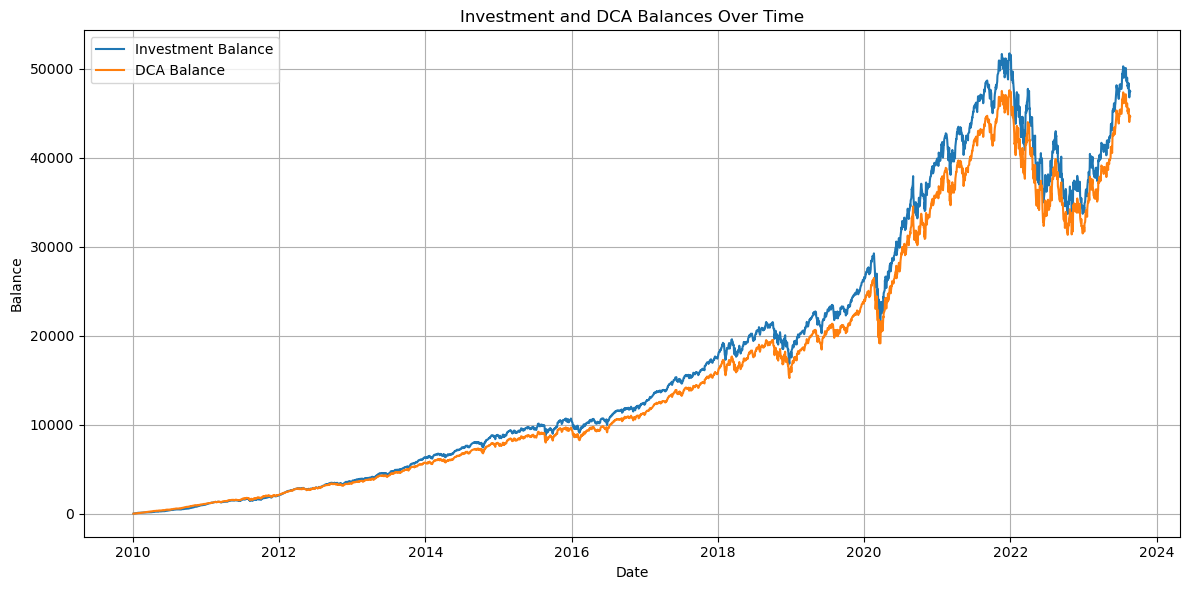

In [12]:
# Extract the two columns
investment_balance = X_test['investment_balance']
DCA_balance = X_test['DCA_balance']

# Create a figure and axis
plt.figure(figsize=(12, 6))
plt.plot(investment_balance, label='Investment Balance', linestyle='-')
plt.plot(DCA_balance, label='DCA Balance', linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Balance')
plt.title('Investment and DCA Balances Over Time')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### XGBoost

In [13]:
# Splitting the traing and test data manually

X_train = df[df['year'] < 2010].drop(['target'], axis=1)
y_train = df[df['year'] < 2010]['target']

X_test = df[df['year'] >= 2010].drop(['target'], axis=1)
y_test = df[df['year'] >= 2010]['target']

In [14]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the parameter grid for GridSearch
param_grid = {
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

# Define a custom precision scorer for GridSearch
precision_scorer = make_scorer(precision_score)

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss")

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    scoring=precision_scorer,
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred = best_model.predict(X_test)


In [15]:
# Apply a threshold to convert probabilities to binary class labels
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Evaluate the model with the binary class labels
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.50
              precision    recall  f1-score   support

         0.0       0.46      0.57      0.51      1553
         1.0       0.56      0.45      0.50      1879

    accuracy                           0.50      3432
   macro avg       0.51      0.51      0.50      3432
weighted avg       0.51      0.50      0.50      3432



In [16]:
# Adding the predicted target as a new column to X_test
X_test['predicted_target'] = y_pred_binary

#### Evaluation

In [17]:
import pandas as pd

# Assuming X_test includes the 'predicted_target' and 'change_percent' columns
# You may need to adjust the column names based on your data
invested_amount = 10  # Initial investment amount
total_investment = 0  # Total amount invested
balance = 0  # Initial balance

# Create a list to store the investment balance and total investment at each prediction
investment_balance = []
total_investment_list = []

for index, row in X_test.iterrows():
    # Update the balance based on the change percentage
    balance *= (1 + row['change_percent'] / 100)
    if row['predicted_target'] == 1:
        # Invest $10 at the end of the day when the model predicts a 1
        # Update the balance based on the change percentage
        total_investment += invested_amount
        balance += invested_amount

    # Update the investment balance and total investment at each step
    investment_balance.append(balance)
    total_investment_list.append(total_investment)

# Create new columns in X_test to store the investment balance and total investment
X_test['investment_balance'] = investment_balance
X_test['total_investment'] = total_investment_list

# Calculate the final investment balance
final_balance = X_test['investment_balance'].iloc[-1]

# Calculate the return rate
return_rate = final_balance / total_investment

print(f"Total Amount Invested: ${total_investment:.2f}")
print(f"Final Investment Balance: ${final_balance:.2f}")
print(f"Return Rate: {return_rate * 100:.2f}%")


Total Amount Invested: $15050.00
Final Investment Balance: $50747.26
Return Rate: 337.19%


In [18]:
# Determine the number of Wednesdays in your dataset
wednesdays = X_test[X_test.index.day_name() == 'Wednesday']

# Calculate the total number of Wednesdays and evenly distribute the total investment amount
num_wednesdays = len(wednesdays)
invest_per_wednesday = total_investment / num_wednesdays

# Create a list to store the investment balance, DCA_balance, and DCA_invested throughout the week
investment_balance_week = []
dca_balance_week = []
dca_invested_week = []
balance = 0  # Initial balance
dca_balance = 0  # Initial DCA balance

for index, row in X_test.iterrows():
    # Update the balance based on the change percentage
    balance *= (1 + row['change_percent'] / 100)
    # Update the DCA balance based on the change percentage
    dca_balance *= (1 + row['change_percent'] / 100)
    
    # Initialize DCA_invested as 0
    dca_invested = 0

    if row.name in wednesdays.index:
        # Invest on Wednesdays using the evenly distributed amount
        balance += invest_per_wednesday
        dca_balance += invest_per_wednesday
        dca_invested = invest_per_wednesday

    # Update the investment balance, DCA_balance, and DCA_invested throughout the week
    investment_balance_week.append(balance)
    dca_balance_week.append(dca_balance)
    dca_invested_week.append(dca_invested)

# Add the DCA_balance and DCA_invested columns to X_test
X_test['DCA_balance'] = dca_balance_week
X_test['DCA_invested'] = dca_invested_week

# Calculate the final investment and return rate for DCA on Wednesdays
final_balance_dca = dca_balance_week[-1]
return_rate_dca = final_balance_dca / total_investment

# Print the results
print(f"Total Amount Invested (Model): ${total_investment:.2f}")
print(f"Total Amount Invested (DCA): ${total_investment:.2f}")
print(f"Final Investment Balance (Model): ${final_balance:.2f}")
print(f"Final Investment Balance (DCA): ${final_balance_dca:.2f}")
print(f"Return Rate (Model): {return_rate * 100:.2f}%")
print(f"Return Rate (DCA): {return_rate_dca * 100:.2f}%")

Total Amount Invested (Model): $15050.00
Total Amount Invested (DCA): $15050.00
Final Investment Balance (Model): $50747.26
Final Investment Balance (DCA): $51287.31
Return Rate (Model): 337.19%
Return Rate (DCA): 340.78%


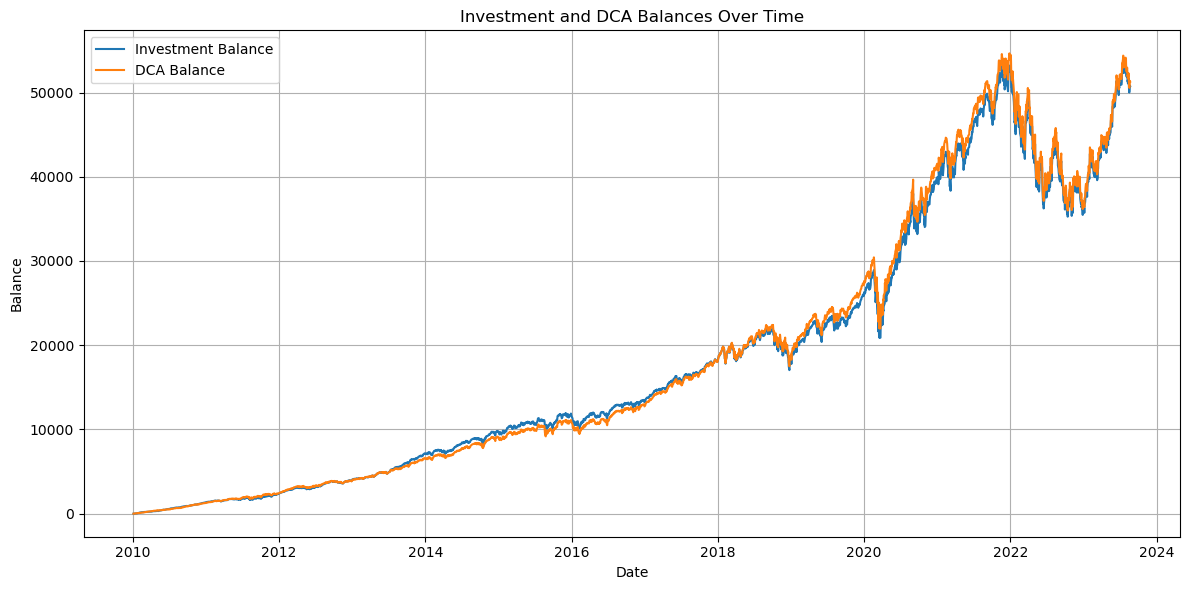

In [19]:
# Extract the two columns
investment_balance = X_test['investment_balance']
DCA_balance = X_test['DCA_balance']

# Create a figure and axis
plt.figure(figsize=(12, 6))
plt.plot(investment_balance, label='Investment Balance', linestyle='-')
plt.plot(DCA_balance, label='DCA Balance', linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Balance')
plt.title('Investment and DCA Balances Over Time')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()